# Изучение рынка заведений общественного питания Москвы

- Автор: Васильева Ирина
- Дата: 11/06/2025

### Цели и задачи проекта

<font color='#777778'>Исследовательский анализ заведений общественного питания Москвы, с целью решить вопрос о открытии и развитии бизнеса в данной сфере. Выявить наиболее перспективные показатели в сфере бизнеса общественного питания.</font>

### Описание данных

<font color='#777778'>Данные сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года по городу Москва. Доступно название
заведения, сетевое/несетевое, категория заведения, часы работы, количество посадочных мест, адрес, средний рейтинг,
средний чек, средния стоимость кофе.
Файл /datasets/rest_info.csv содержит информацию о заведениях общественного питания:
name — название заведения;
address — адрес заведения;
district — административный район, в котором находится заведение, например Центральный административный округ;
category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
hours — информация о днях и часах работы;
rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
0 — заведение не является сетевым;
1 — заведение является сетевым.
seats — количество посадочных мест.
Файл /datasets/rest_price.csv содержит информацию о среднем чеке в заведениях общественного питания:
price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
«Средний счёт: 1000–1500 ₽»;
«Цена чашки капучино: 130–220 ₽»;
«Цена бокала пива: 400–600 ₽».
и так далее;
middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.</font>

### Содержимое проекта

<font color='#777778'>Загрузка данных и знакомство с ними. Предобработка данных. Исследовательский анализ данных. Итоговые выводы и рекомендации. </font>

---

## 1. Загрузка данных и знакомство с ними



In [3]:
import pandas as pd
from IPython.display import display


df = pd.read_csv('/datasets/rest_info.csv')

print("Первые 5 строк:")
display(df.head())

print("\nПоследние 5 строк:")
display(df.tail())

print("\nОбщая информация:")
display(df.info())

Первые 5 строк:


,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0



Последние 5 строк:


,id,name,category,address,district,hours,rating,chain,seats
8401,0342ad1a45ed41ba89dcba246a8267e5,Суши Мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86.0
8402,ee6bb7c3650e47bd8186fca08eda1091,Миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150.0
8403,62e8c64d4c89467aba608e39ef87616b,Самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150.0
8404,06a0db5ecd4842d48cd6350aa923e297,Чайхана Sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0
8405,9d56f8f7a7f74df1a925bc0fd2de8aae,Kebab Time,кафе,"Москва, Россошанский проезд, 6",Южный административный округ,"ежедневно, круглосуточно",3.9,0,12.0



Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


None

Данные содержатся в 9 колонках. Названия колонок соответствуют правилу snake-name. Пропуски есть в колонках hours и seats. По типу данных 6 object, int64 - 1,  float64 - 2.

- Знакомимся с данными и изучаем общую информацию о них.

In [4]:

df = pd.read_csv('/datasets/rest_price.csv')

print("Первые 5 строк:")
display(df.head()) 

print("\nПоследние 5 строк:")
display(df.tail()) 

print("\nОбщая информация:")
display(df.info())  

Первые 5 строк:


,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN



Последние 5 строк:


,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
4053,962800540173458486f3c465437c2d8b,средние,Цена бокала пива:от 140 ₽,NaN,NaN
4054,4277890d659341848d7051cbf2e51f51,выше среднего,Средний счёт:1000–1500 ₽,1250.0,NaN
4055,026cbc478f9b4c3294a83458dcd89982,средние,NaN,NaN,NaN
4056,71cc394927204d45b81c3a91edb47955,NaN,Средний счёт:50–250 ₽,150.0,NaN
4057,62e8c64d4c89467aba608e39ef87616b,NaN,Средний счёт:от 150 ₽,150.0,NaN



Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


None

Данные содеражатся в 5 колонках. Названия колонок соответсвуют snake-name. По типу данных 3 столбца object и 2 столбца float64. Пропуски содержатся в 4 столбцах.

---

### Промежуточный вывод


Некоторые типы данных можно изменить для экономии памяти. Столбцы с пропусками требуют дальнейшего изучения.

### Подготовка единого датафрейма

- Объединяем данные двух датасетов в один, с которым и продолжим работу.

In [5]:

df_info = pd.read_csv('/datasets/rest_info.csv')
df_price = pd.read_csv('/datasets/rest_price.csv')

df_merged = df_info.merge(df_price, on='id', how='left')

print("Первые 5 строк:")
display(df_merged.head())

print("\nОбщая информация:")
display(df_merged.info()) 

Первые 5 строк:


,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN



Общая информация:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


None

Провдено  левое объединение по столбцу id

## 2. Предобработка данных

Подготовим данные к исследовательскому анализу:

- Изучим корректность типов данных и при необходимости проведем их преобразование.

In [6]:
df_merged['chain'] = df_merged['chain'].astype('int8')
df_merged['rating'] = df_merged['rating'].astype('float32')
df_merged['seats'] = df_merged['seats'].astype('float32')
df_merged['middle_avg_bill'] = df_merged['middle_avg_bill'].astype('float32')
df_merged['middle_coffee_cup'] = df_merged['middle_coffee_cup'].astype('float32')
print(df_merged.dtypes)

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float32
chain                   int8
seats                float32
price                 object
avg_bill              object
middle_avg_bill      float32
middle_coffee_cup    float32
dtype: object


Проведено преобразование типов данных

- Изучим пропущенные значения в данных: посчитаем их количество в каждом столбце датафрейме, изучим данные с пропущенными значениями и предположим гипотезы их появления. Проведем обработку пропущенных значений.

In [7]:
print(df_merged.isna().sum())

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64


Пропуски в часах работы, количестве посадочных мест, категория цен, и столбцы со средними ценами и диапозоном цен.

In [7]:
df_merged['hours'] = df_merged['hours'].fillna('неизвестно')
df_merged['price'] = df_merged['price'].fillna('неизвестно')
print(df_merged[['hours', 'price']].isna().sum())

hours    0
price    0
dtype: int64


В 'hours' и 'price' пропуски заменены на "неизвестно". В остальных столбцах с пропусками работать нельзя, это числовые данные и они затрагивают слишком большой объем данных.

- Проверим данные на явные и неявные дубликаты, например поля с названием и адресом заведения. Для оптимизации проверки нормализуем данные в текстовых столбцах, например с названием заведения.

In [8]:
print("Полные дубликаты:", df_merged.duplicated().sum())

Полные дубликаты: 0


In [9]:
df_merged['name_normalized'] = df_merged['name'].str.lower().str.strip()
df_merged['address_normalized'] = df_merged['address'].str.lower().str.strip()
name_address_dupes = df_merged.duplicated(subset=['name_normalized', 'address_normalized']).sum()
print("Неявные дубликаты по названию и адресу:", name_address_dupes)

Неявные дубликаты по названию и адресу: 4


In [9]:
dupes = df_merged[df_merged.duplicated(subset=['name_normalized', 'address_normalized'], keep=False)]
print(dupes.sort_values(by=['name_normalized', 'address_normalized']))

                                    id                       name  category  \
1430  62608690e9cc464fbcd980cfd552e334                  More poke  ресторан   
1511  a69f018d5c064873a3b491b0121bc1b4                  More Poke  ресторан   
189   072032ce16dc47bfbc63b672c75bd371                       Кафе      кафе   
215   897ddbc6746c4388b19dc8a9fcdbb488                       Кафе      кафе   
2211  c6ef39ae8a8c483d8f9a6531bc386a2c  Раковарня Клешни и Хвосты  ресторан   
2420  aba1de7ad7d64ac0a3f8684bda29d905  Раковарня Клешни и хвосты   бар,паб   
3091  3c2a73ea79a04be48858fab3685f2f37            Хлеб да Выпечка  булочная   
3109  d3116844e4e048f99614eb30be3214e0            Хлеб да выпечка      кафе   

                                      address  \
1430  Москва, Волоколамское шоссе, 11, стр. 2   
1511  Москва, Волоколамское шоссе, 11, стр. 2   
189              Москва, парк Ангарские Пруды   
215              Москва, парк Ангарские пруды   
2211               Москва, проспект Мира, 1

Явные дубликаты не выявлены. 4 неявных дубликата нужно удалить.

In [11]:

df_merged['name_normalized'] = df_merged['name'].str.lower().str.strip()
df_merged['address_normalized'] = df_merged['address'].str.lower().str.strip()

df_merged_cleaned = df_merged.drop_duplicates(subset=['name_normalized', 'address_normalized'], keep='first').copy()

print("Размер до:", len(df_merged))
print("Размер после:", len(df_merged_cleaned))

Размер до: 8406
Размер после: 8402


4 дубликата удалено, это менее 0,5% данных

- Для дальнейшей работы создадим столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [12]:
df_merged_cleaned.loc[:, 'is_24_7'] = df_merged_cleaned['hours'].str.contains('ежедневно, круглосуточно', case=False)
print(df_merged_cleaned[['hours', 'is_24_7']].head(10))
print(df_merged_cleaned['is_24_7'].value_counts())

                                               hours is_24_7
0                             ежедневно, 10:00–22:00   False
1                             ежедневно, 10:00–22:00   False
2  пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...   False
3                             ежедневно, 09:00–22:00   False
4                             ежедневно, 10:00–22:00   False
5                             ежедневно, 10:00–23:00   False
6                  пн 15:00–04:00; вт-вс 15:00–05:00   False
7  пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00...   False
8                             ежедневно, 10:00–22:00   False
9                             ежедневно, 12:00–00:00   False
False    7137
True      730
Name: is_24_7, dtype: int64


Создан дополнительный столбец для признака работает ежедневно и круглосуточно.

---

### Промежуточный вывод



Изначально было получено 2 таблицы. В первой было 8406 строк, было произведено объединение таблиц. Явные дубликаты не выявлены. 
Неявные дубликаты - 4 при проверке оказались дублями, они удалены. По пропускам была проведена работа по их заполнению, 
только в 2 колонках, остальные пропуски оставлены. Типы данных были оптимизированы.

## 3. Исследовательский анализ данных
Проведем исследовательский анализ исходных данных.

При исследовании данных используем визуализации.


---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

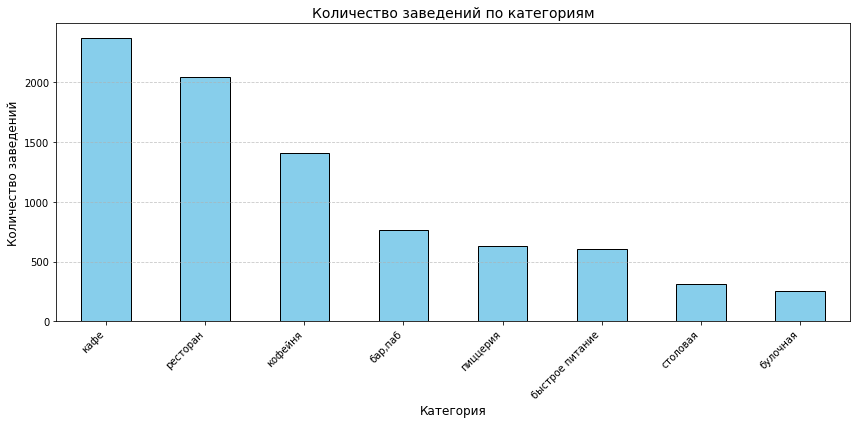

In [13]:
import matplotlib.pyplot as plt

category_counts = df_merged_cleaned['category'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Количество заведений по категориям', fontsize=14)
plt.xlabel('Категория', fontsize=12)
plt.ylabel('Количество заведений', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

В представленных данных 8 типов категорий заведений. По количеству ТОП-3 это кафе(более 2000), ресторан(около 2000) и кофейня(около 1500).
Меньше всего булочных.

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

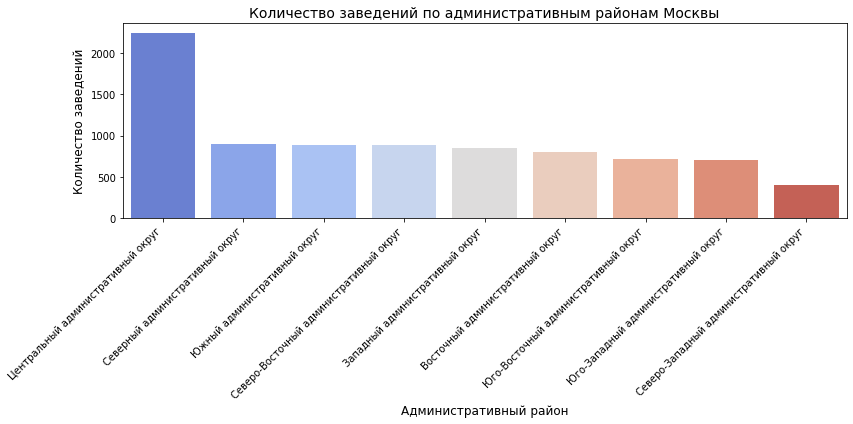

In [14]:
import seaborn as sns

district_counts = df_merged_cleaned['district'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=district_counts.index, y=district_counts.values, palette='coolwarm')
plt.title('Количество заведений по административным районам Москвы', fontsize=14)
plt.xlabel('Административный район', fontsize=12)
plt.ylabel('Количество заведений', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Данные содержат информацию о 9 административных округах города Москва. Распределение количества заведений по административным огругам Москвы - больше всего заведений в Центральном административном
округе, более 2000 заведений. В остальных округах распределение относительно равномерное 500-1000 заведений. Меньше всего
в Северо-Западном(менее 500 заведений).

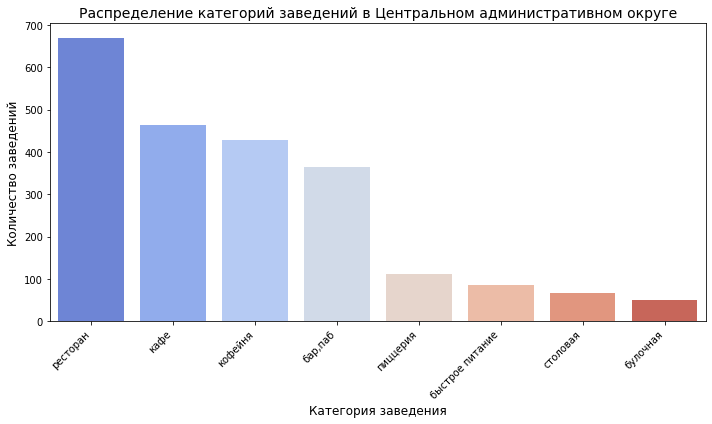

In [15]:
central_df = df_merged_cleaned[df_merged_cleaned['district'] == 'Центральный административный округ']

category_counts = central_df['category'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='coolwarm')
plt.title('Распределение категорий заведений в Центральном административном округе', fontsize=14)
plt.xlabel('Категория заведения', fontsize=12)
plt.ylabel('Количество заведений', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Если рассмотреть Центральный административный округ, то в разрезе категорий больше всего ресторанов(более 700), кафе и кофейни около 400. Меньше всего булочных.

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

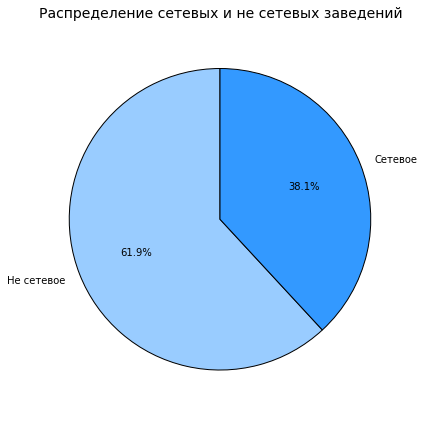

In [16]:
chain_labels = ['Не сетевое', 'Сетевое']

chain_counts = df_merged_cleaned['chain'].value_counts().sort_index()

plt.figure(figsize=(6, 6))
plt.pie(
    chain_counts, 
    labels=chain_labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors = ['#99ccff', '#3399ff'],
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Распределение сетевых и не сетевых заведений', fontsize=14)
plt.axis('equal') 
plt.tight_layout()
plt.show()

Относительно принадлежности к сетевым. В представленных данных 61,9% заведений не сетевые. 38,1% заведений сетевые.

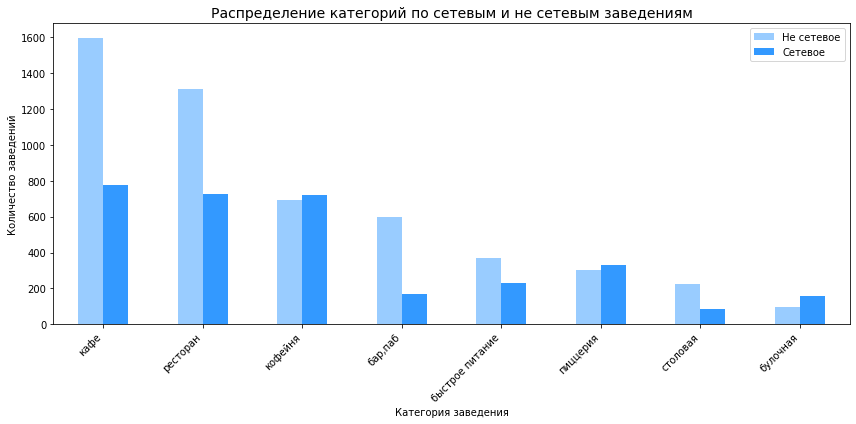

In [19]:
category_chain_counts = df_merged_cleaned.groupby(['category', 'chain']).size().unstack(fill_value=0)

category_chain_counts = category_chain_counts.sort_values(by=category_chain_counts.columns.tolist(), ascending=False)

category_chain_counts.plot(kind='bar', figsize=(12, 6), color=['#99ccff', '#3399ff'])

plt.title('Распределение категорий по сетевым и не сетевым заведениям', fontsize=14)
plt.xlabel('Категория заведения')
plt.ylabel('Количество заведений')
plt.legend(['Не сетевое', 'Сетевое']) 
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Относительно категорий заведений. Сетевые преобладают над не сетевыми только в пиццериях, кофейнях и булочных. Не сетевых больше всего ресторанов(около 1600) и кафе(около 1400).

---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


In [20]:
Q1 = df_merged_cleaned['seats'].quantile(0.25)
Q3 = df_merged_cleaned['seats'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_merged_cleaned[(df_merged_cleaned['seats'] < lower_bound) | (df_merged_cleaned['seats'] > upper_bound)]

print(f"Количество выбросов: {len(outliers)}")

Количество выбросов: 318


318 значений количества посадочных мест относятся к аномальным выбросам.

In [21]:
category_counts = outliers['category'].value_counts()
print(category_counts)

ресторан           94
кафе               67
кофейня            55
бар,паб            45
пиццерия           21
быстрое питание    21
столовая            9
булочная            6
Name: category, dtype: int64


По категориям много выбросов в ресторанах и кафе, это может объясняться их большим размером.

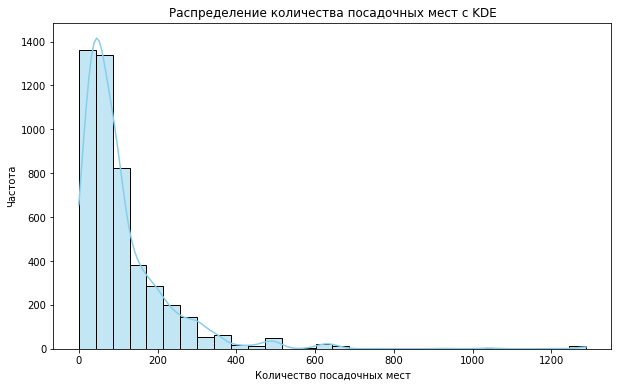

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(df_merged_cleaned['seats'], bins=30, kde=True, color='skyblue')
plt.title('Распределение количества посадочных мест с KDE')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Частота')
plt.show()

Большинство заведений имеют до 100 посадочных мест.

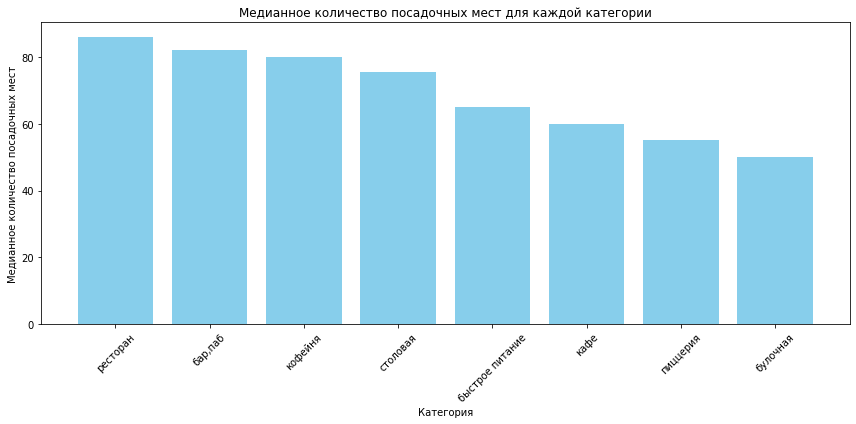

In [22]:
median_seats = df_merged_cleaned.groupby('category')['seats'].median().reset_index()
median_seats = median_seats.sort_values(by='seats', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(median_seats['category'], median_seats['seats'], color='skyblue')
plt.xlabel('Категория')
plt.ylabel('Медианное количество посадочных мест')
plt.title('Медианное количество посадочных мест для каждой категории')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

В ресторанах больше всего посадоных мест(более 80), бар/паб и коефейня около 80 мест. Для всех заведений медианое значение количества посадочных мест больше 50.

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

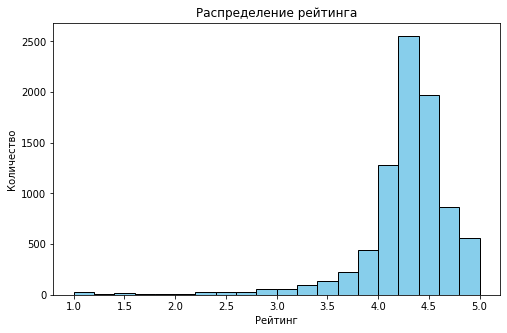

In [34]:
plt.figure(figsize=(8,5))
plt.hist(df_merged_cleaned['rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение рейтинга')
plt.xlabel('Рейтинг')
plt.ylabel('Количество')
plt.show()

Распределение на гистограмме смещено вправо. Самый частый рейтинг около 4,3.

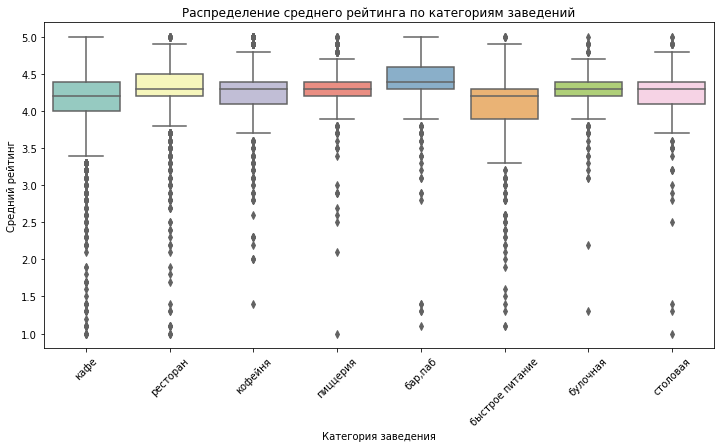

In [35]:

plt.figure(figsize=(12,6))
sns.boxplot(data=df_merged_cleaned, x='category', y='rating', palette='Set3')

plt.title('Распределение среднего рейтинга по категориям заведений')
plt.xlabel('Категория заведения')
plt.ylabel('Средний рейтинг')
plt.xticks(rotation=45)
plt.show()

Все заведения имеют медиану между 4,2-4,5. Выбросы с низким рейтингом характерны для кафе, быстрого питания. 

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

In [38]:
!pip install phik

     |████████████████████████████████| 686 kB 1.2 MB/s eta 0:00:01


rating      1.000000
district    0.278489
price       0.259125
category    0.188473
is_24_7     0.088686
chain       0.064788
seats       0.000000
Name: rating, dtype: float64


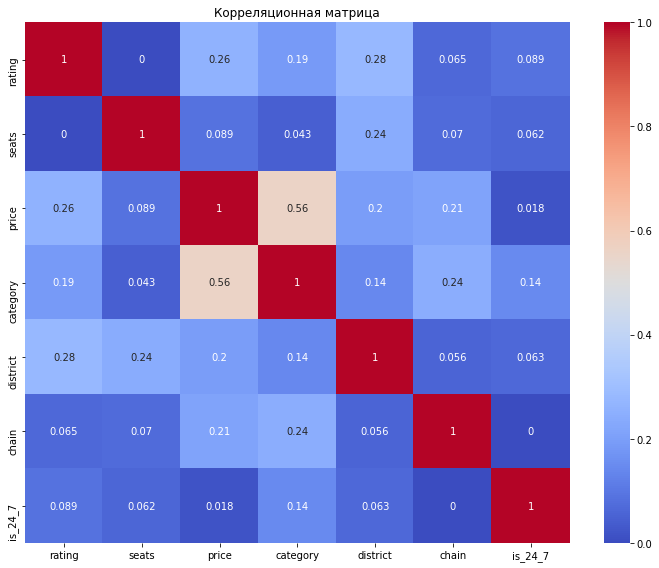

In [41]:
from phik import phik_matrix
from phik.report import plot_correlation_matrix

df_corr = df_merged_cleaned.copy()

cols_to_use = ['rating', 'seats', 'price', 'category', 'district', 'chain', 'is_24_7']
df_corr = df_corr[cols_to_use].dropna()

for col in ['category', 'district', 'chain', 'is_24_7', 'price']:
    df_corr[col] = df_corr[col].astype(str)

phik_corr = df_corr.phik_matrix(interval_cols=['rating', 'seats'])

print(phik_corr['rating'].sort_values(ascending=False))

plt.figure(figsize=(10, 8))
sns.heatmap(phik_corr, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Корреляционная матрица')
plt.tight_layout()
plt.show()

Выявлена умеренная положительная корреляция между рейтингом и категорией цен, а также АО.

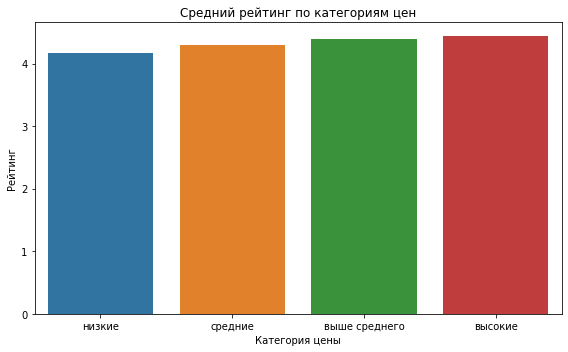

In [40]:

order = ["низкие", "средние", "выше среднего", "высокие"]

plt.figure(figsize=(8, 5))
sns.barplot(data=df_merged_cleaned, x="price", y="rating", order=order, ci=None)

plt.title("Средний рейтинг по категориям цен")
plt.xlabel("Категория цены")
plt.ylabel("Рейтинг")
plt.tight_layout()
plt.show()

Связь между категорией цены и рейтингом есть, но она очень слабая, у категрии цен выше-среднего и высокие средний рейтинг немного выше, чем для других категорий.

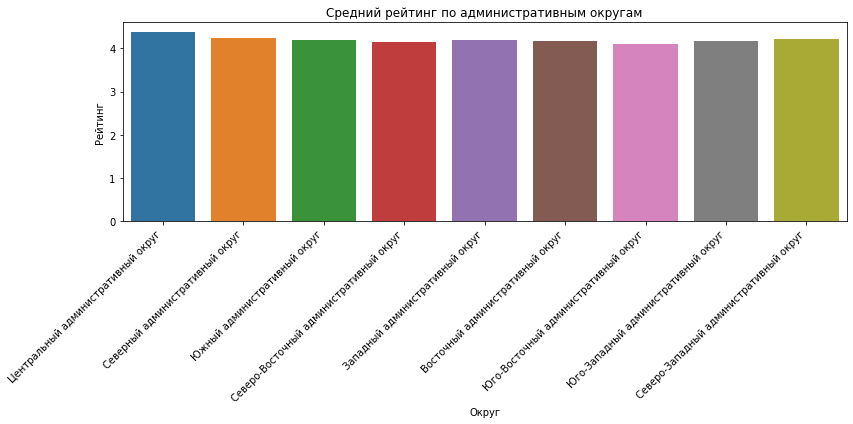

In [47]:
district_order = [
    "Центральный административный округ",
    "Северный административный округ",
    "Южный административный округ",
    "Северо-Восточный административный округ",
    "Западный административный округ",
    "Восточный административный округ",
    "Юго-Восточный административный округ",
    "Юго-Западный административный округ",
    "Северо-Западный административный округ"
]

plt.figure(figsize=(12, 6))
sns.barplot(data=df_merged_cleaned, x="district", y="rating", order=district_order, ci=None)

plt.title("Средний рейтинг по административным округам")
plt.xlabel("Округ")
plt.ylabel("Рейтинг")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

В ЦАО средний рейтинг немного выше. Вцелом рейтинг около 4.



### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

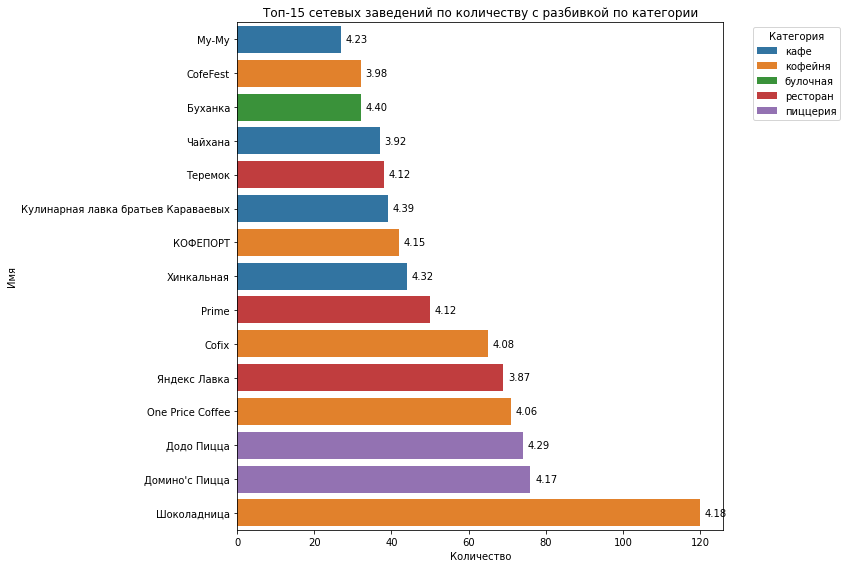

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Только сетевые заведения
top_names = (
    df_merged_cleaned[df_merged_cleaned['chain'] == 1]
    .groupby('name')
    .agg(
        count=('name', 'size'),
        avg_rating=('rating', 'mean'),
        most_common_category=('category', lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    )
    .sort_values('count', ascending=False)
    .head(15)
    .reset_index()
)

plt.figure(figsize=(12, 8))

top_names_sorted = top_names.sort_values('count')
sns.barplot(
    data=top_names_sorted,
    x='count',
    y='name',
    hue='most_common_category',
    dodge=False 
)

plt.title('Топ-15 сетевых заведений по количеству с разбивкой по категории')
plt.xlabel('Количество')
plt.ylabel('Имя')
plt.legend(title='Категория', bbox_to_anchor=(1.05, 1), loc='upper left')

for i, (count, avg_rating) in enumerate(zip(top_names_sorted['count'], top_names_sorted['avg_rating'])):
    plt.text(
        x=count + max(top_names_sorted['count']) * 0.01, 
        y=i,
        s=f'{avg_rating:.2f}',
        va='center'
    )

plt.tight_layout()
plt.show()

По сетям в ТОП-3 входят Шоколадница, Додо Пицца, т Домино-с Пицца, по типу заведения это кофейня и пиццерия. Срдений рейтинг
около 4,2.

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


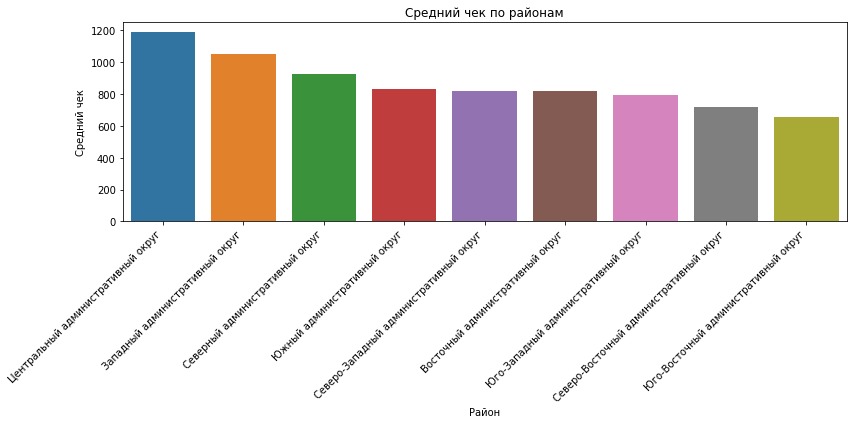

In [18]:
df_plot = df_merged_cleaned[['district', 'middle_avg_bill']].dropna()

df_sorted = df_plot.groupby('district', as_index=False)['middle_avg_bill'].mean()
df_sorted = df_sorted.sort_values(by='middle_avg_bill', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_sorted, x='district', y='middle_avg_bill', ci=None)
plt.xticks(rotation=45, ha='right')
plt.title('Средний чек по районам')
plt.xlabel('Район')
plt.ylabel('Средний чек')
plt.tight_layout()
plt.show()

Самый высокий средний чек в Центральном административном округе(около 1200), на 2 месте Западный административны округ(около 1000). Самый низкий средний чек в Юго-восточном административном округе(около 700).

---


---

### Промежуточный вывод



Топ-3 заведений по количеству в Москве - ресторан, кофейня или кафе. Самое большое количество заведений в Центральном административном
округе. В этом округе преобладают категории заведений - ресторан, кафе, кофейня. Большая часть заведений в Москве несетевые.
Сетевые завдениея преобладают только в пиццериях и кофейнях. 
По сетям в ТОП-3 входят Шоколадница, Додо Пицца, т Домино-с Пицца, по типу заведения это кофейня и пиццерия. 
Большинство заведений имеют до 100 посадочных мест.
Большинство заведений имеют хорошую медиану рейтинга(более 4). Сильной связи между рейтингом и другими показателями(цены, часы работы, количество посадочных мест, адрес) нет.
Самый высокий средний чек в Центральном административном округе(около 1200), на 2 месте Западный административны округ(около 1000). Самый низкий средний чек в Юго-восточном административном округе(около 700).

## 4. Итоговый вывод и рекомендации



Проведен исследовательский анализ заведений общественного питания Москвы, с целью решить вопрос о развитии бизнеса в данной сфере. Данные сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года по городу Москва.
Выполнена загрузка данных и знакомство с ними. Предобработка данных. Исследовательский анализ данных.
Рекомендации - по локации лучше выбрать ЦАО Москвы. В этом районе много заведений и высокий средний чек. По типу заведения лучше
выбрать ресторан, кафе, кофейню. Размер заведения до 100 посадочных мест. В Москве преобладают несетевые заведения.
Топ сетевых заведений(Шоколадница, Додо и Доминопицца) тоже стоит рассматривать, у них хороший средний рейтинг и высокая узнаваемость.